# Example of masks

## Creating an instance

In [31]:
import matplotlib
matplotlib.rcParams['figure.dpi']=250


In [32]:
from diffractio import degrees, mm, np, plt, um
from diffractio.scalar_masks_X import Scalar_mask_X

from numpy import loadtxt

## Procedures to generate masks

### mask_from_function

{'R1': 5000.0, 'R2': 1000.0, 'x0': 0.0, 'y0': 0.0, 'h1': 1000.0, 'h2': -1000.0}


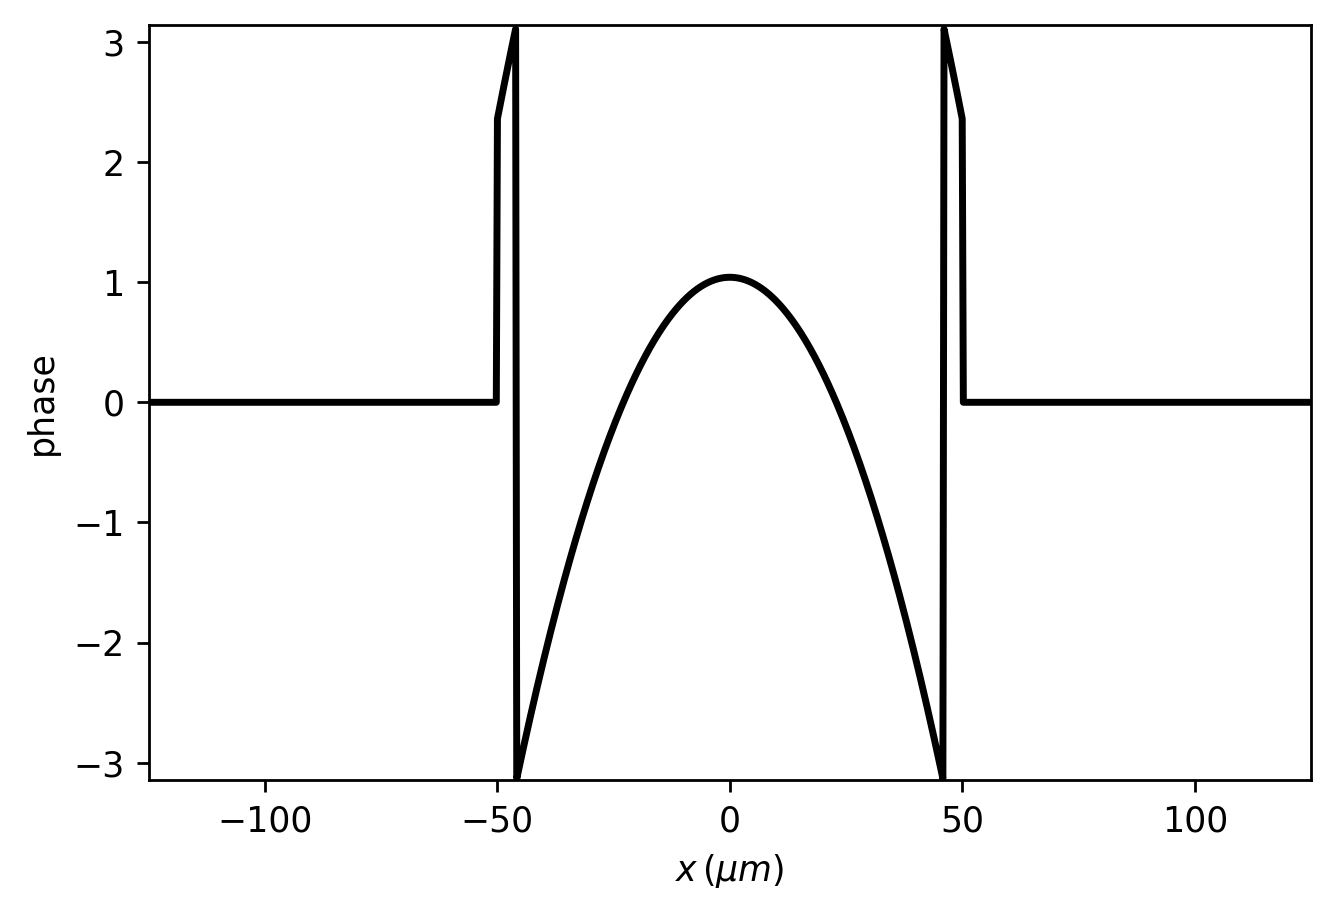

In [33]:
num_data = 1024
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

f1 = "R1-h1+np.sqrt(R1**2-(self.x-x0)**2)"
f2 = "R2-h2+np.sqrt(R2**2-(self.x-x0)**2)"
v_globals = {
    'R1': 5 * mm,
    'R2': 1 * mm,
    'x0': 0 * um,
    'y0': 0 * um,
    'h1': 1 * mm,
    'h2': -1 * mm
}
index = 1.5
print(v_globals)

t1 = Scalar_mask_X(x, wavelength)
t1.mask_from_function(
    x0=0 * um,
    index=index,
    f1=f1,
    f2=f2,
    v_globals=v_globals,
    radius=100 * um)
t1.draw(kind='phase')

### mask_from_array

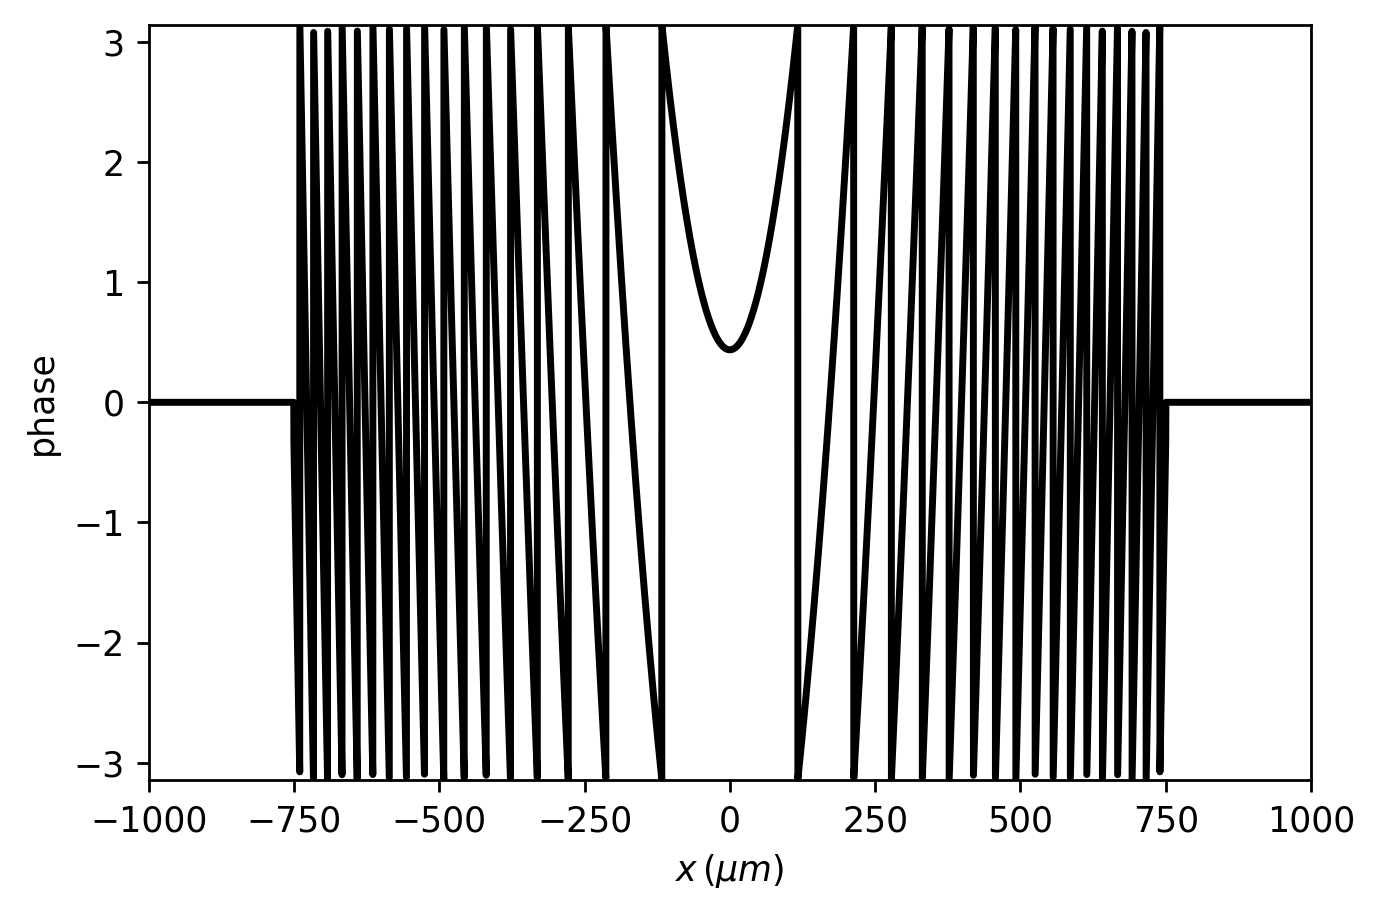

In [34]:
num_data = 1024 * 8
x = np.linspace(-1 * mm, 1 * mm, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)

profile1 = loadtxt('profile1.txt')
profile2 = loadtxt('profile2.txt')
t1.mask_from_array(
    x0=0,
    index=1.25,
    array1=profile1 * mm,
    array2=profile2 * mm,
    interp_kind='quadratic',
    radius=1.5 * mm)

t1.draw(kind='phase')

## slit

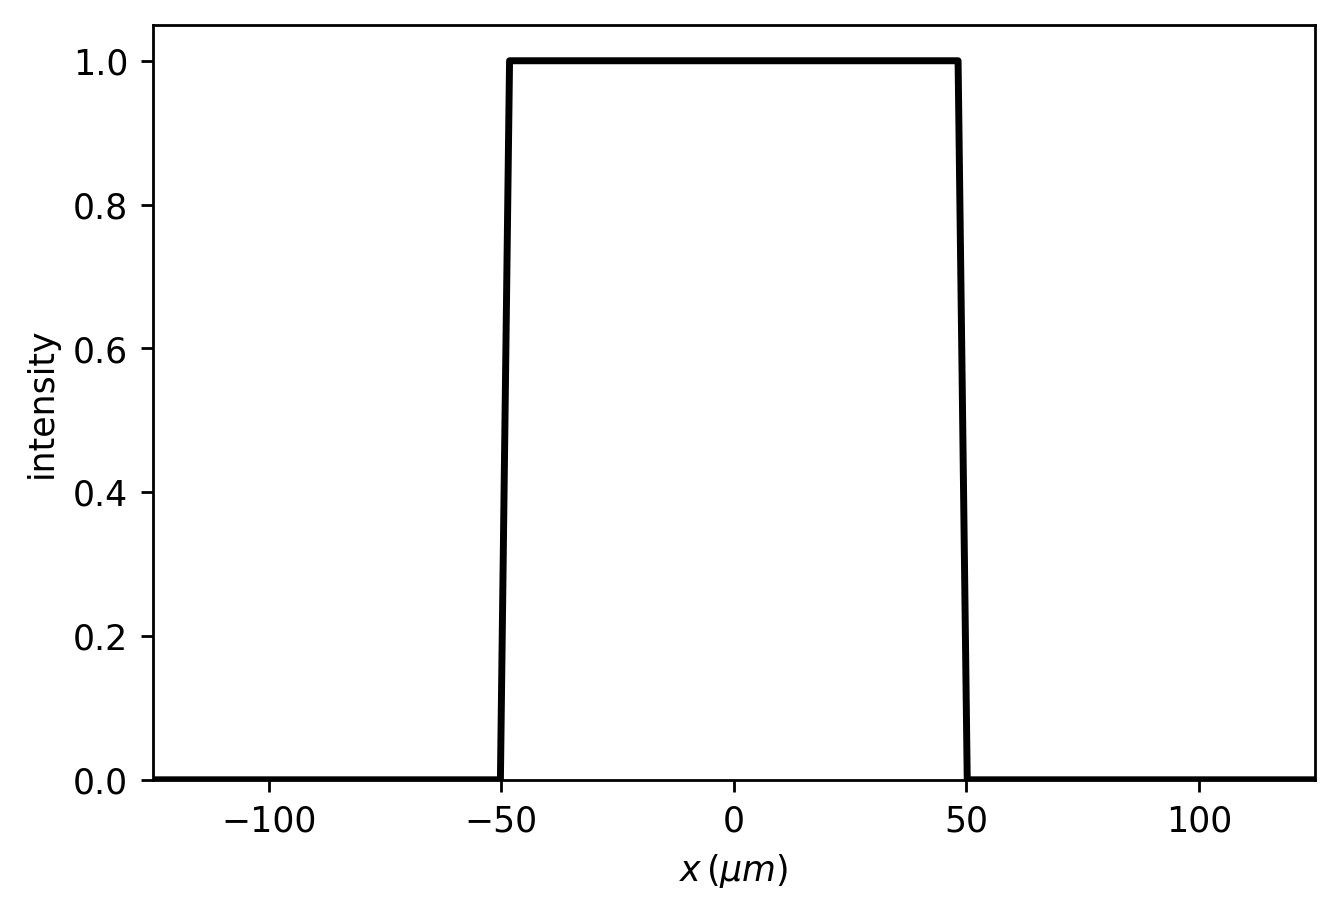

In [35]:
num_data = 128
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.slit(x0=0, size=100 * um)
t1.draw()

## double_slit

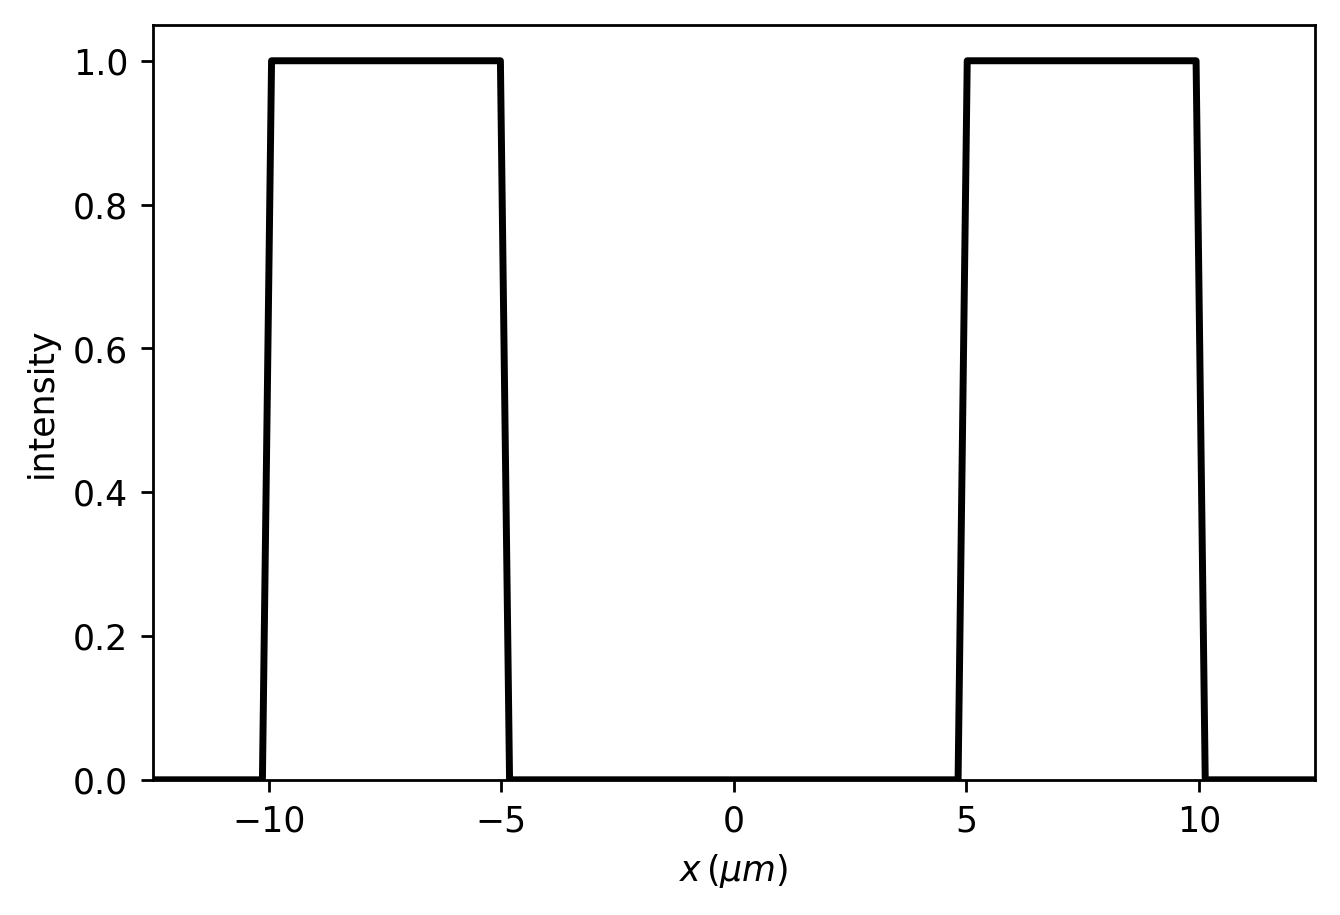

In [36]:
num_data = 128
length = 25 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.double_slit(x0=0, size=5 * um, separation=15 * um)
t1.draw()

## two levels

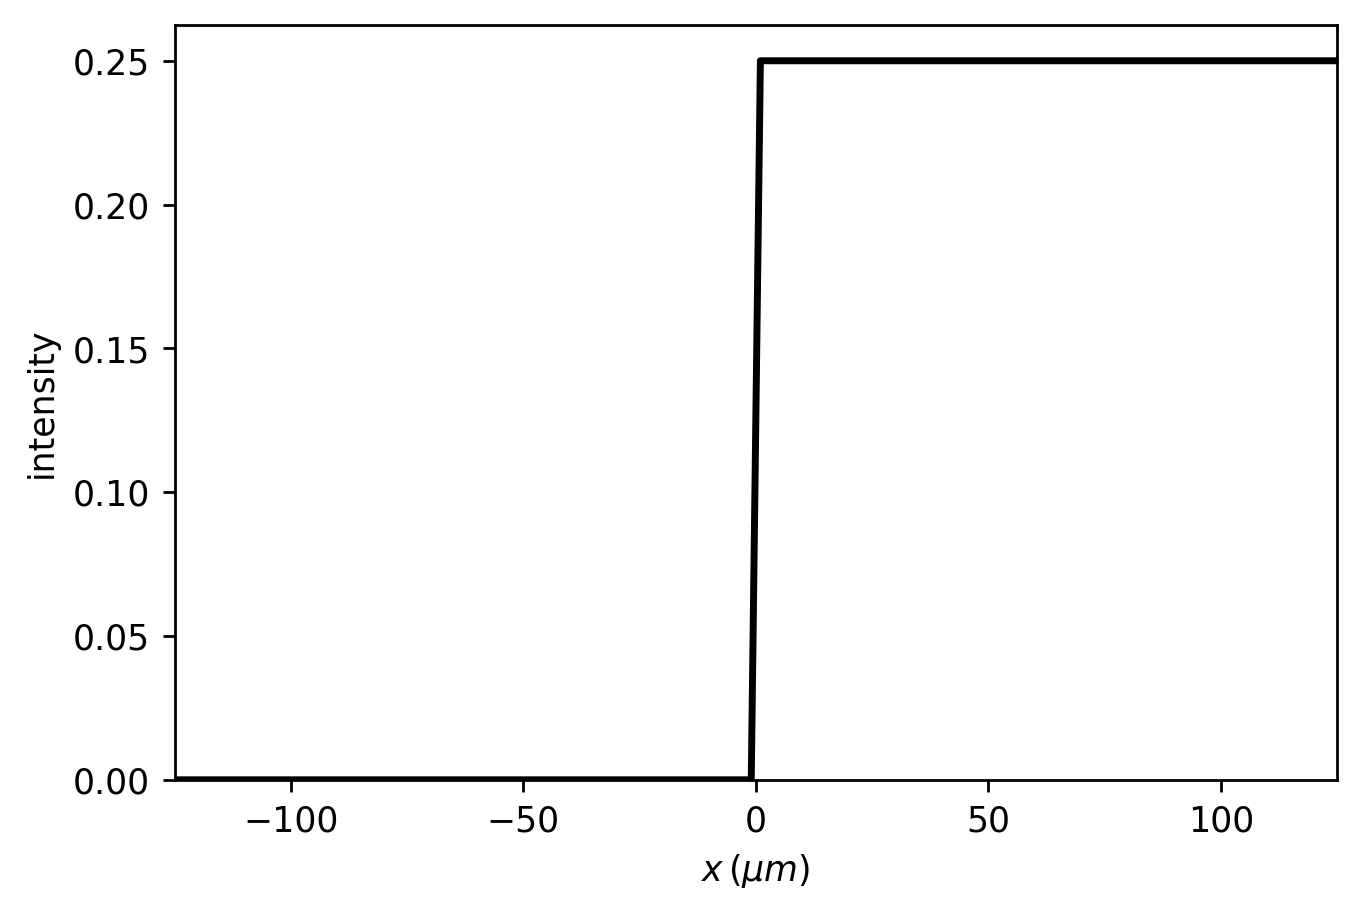

In [37]:
num_data = 128
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.two_levels(level1=0, level2=.5, x_edge=0)
t1.draw()

## gray scale

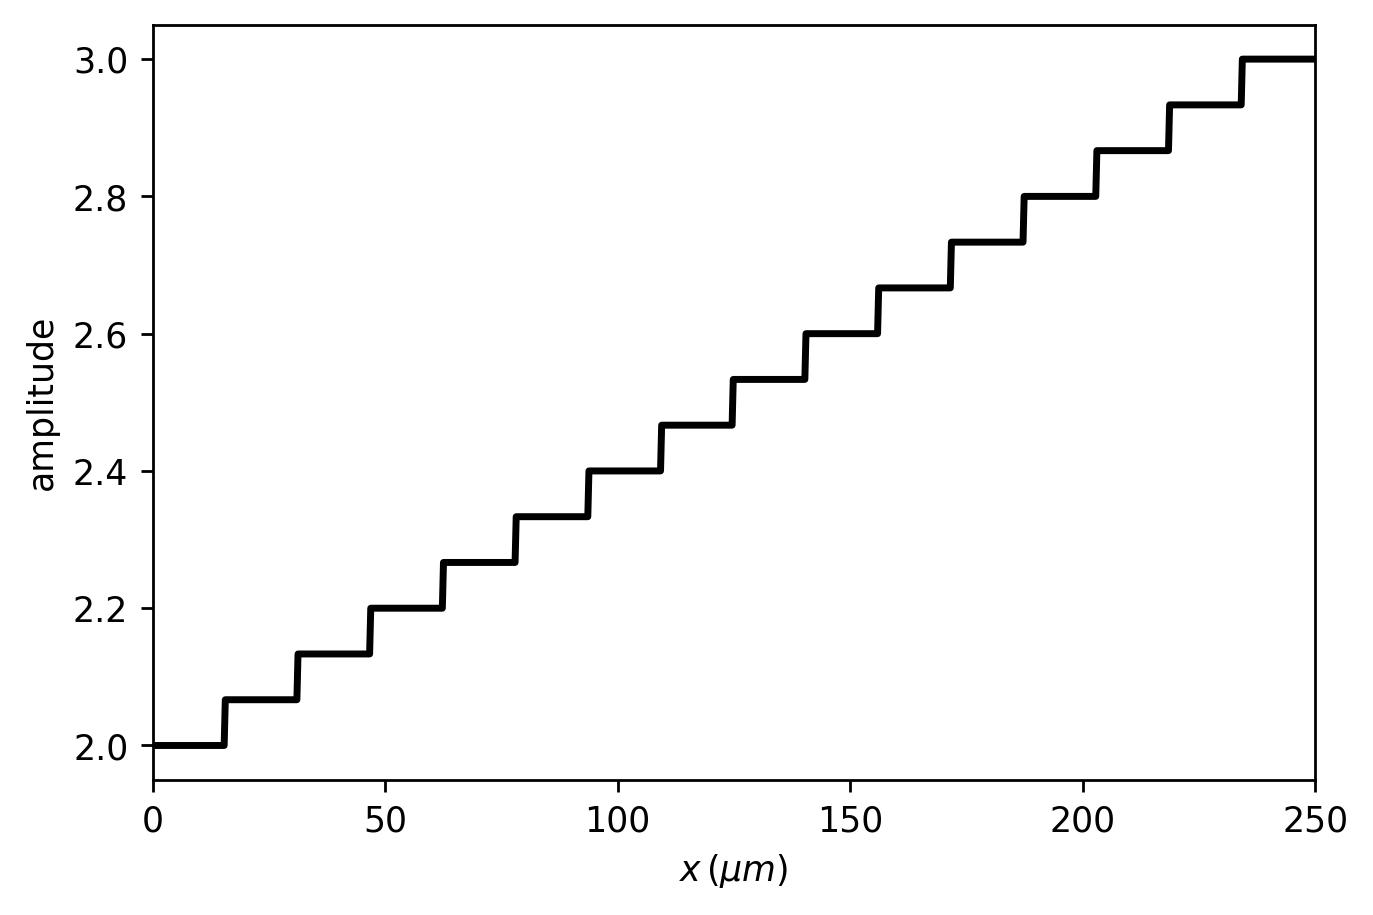

In [38]:
x = np.linspace(0, 250 * um, 1024)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.gray_scale(num_levels=16, levelMin=2, levelMax=3)
t1.draw(kind='amplitude')

## prism

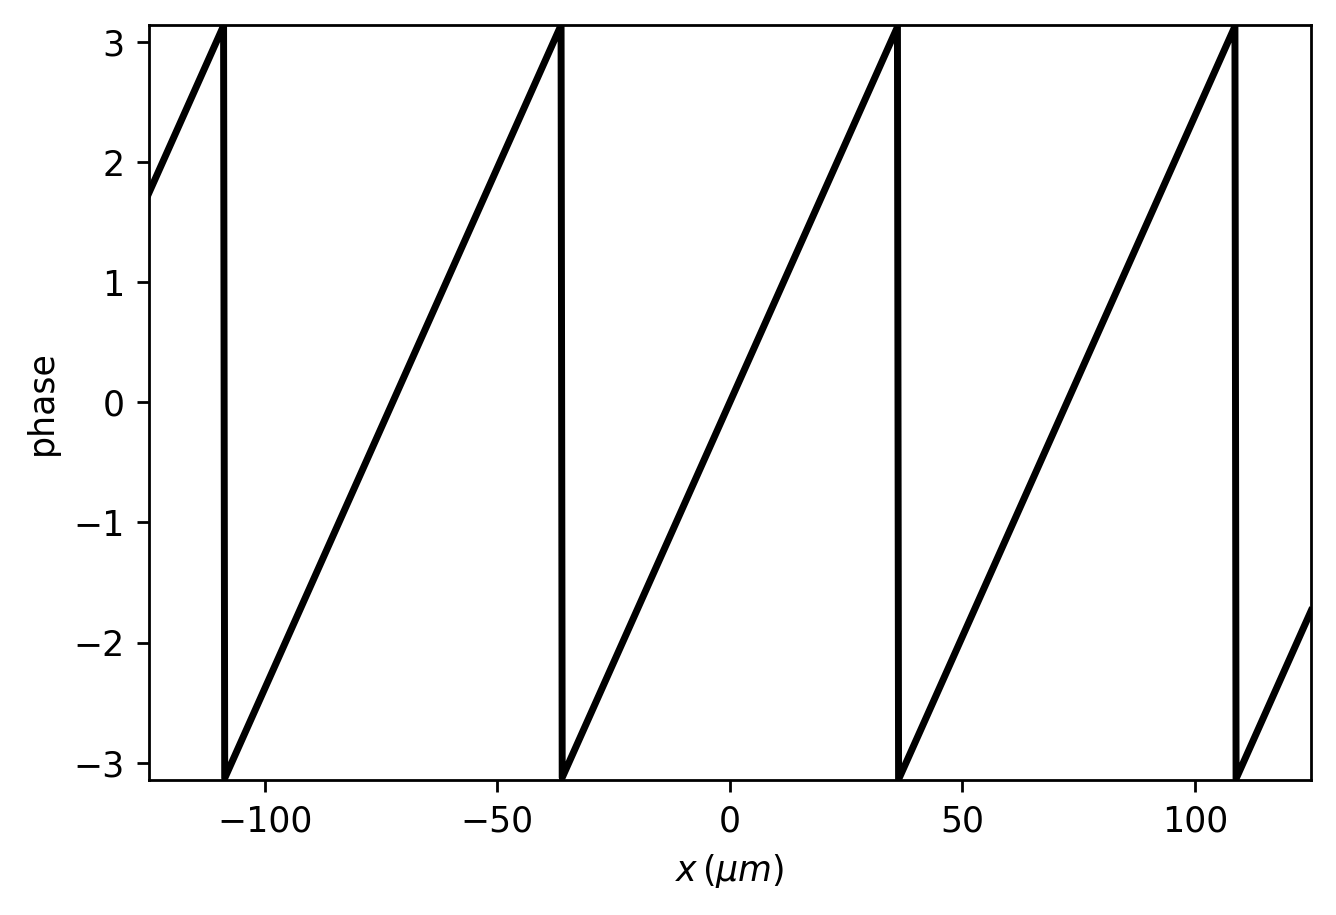

In [39]:
num_data = 1024
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.prism(x0=0, n=1.5, anglex=1 * degrees)
t1.draw(kind='phase')

## Fresnel biprism

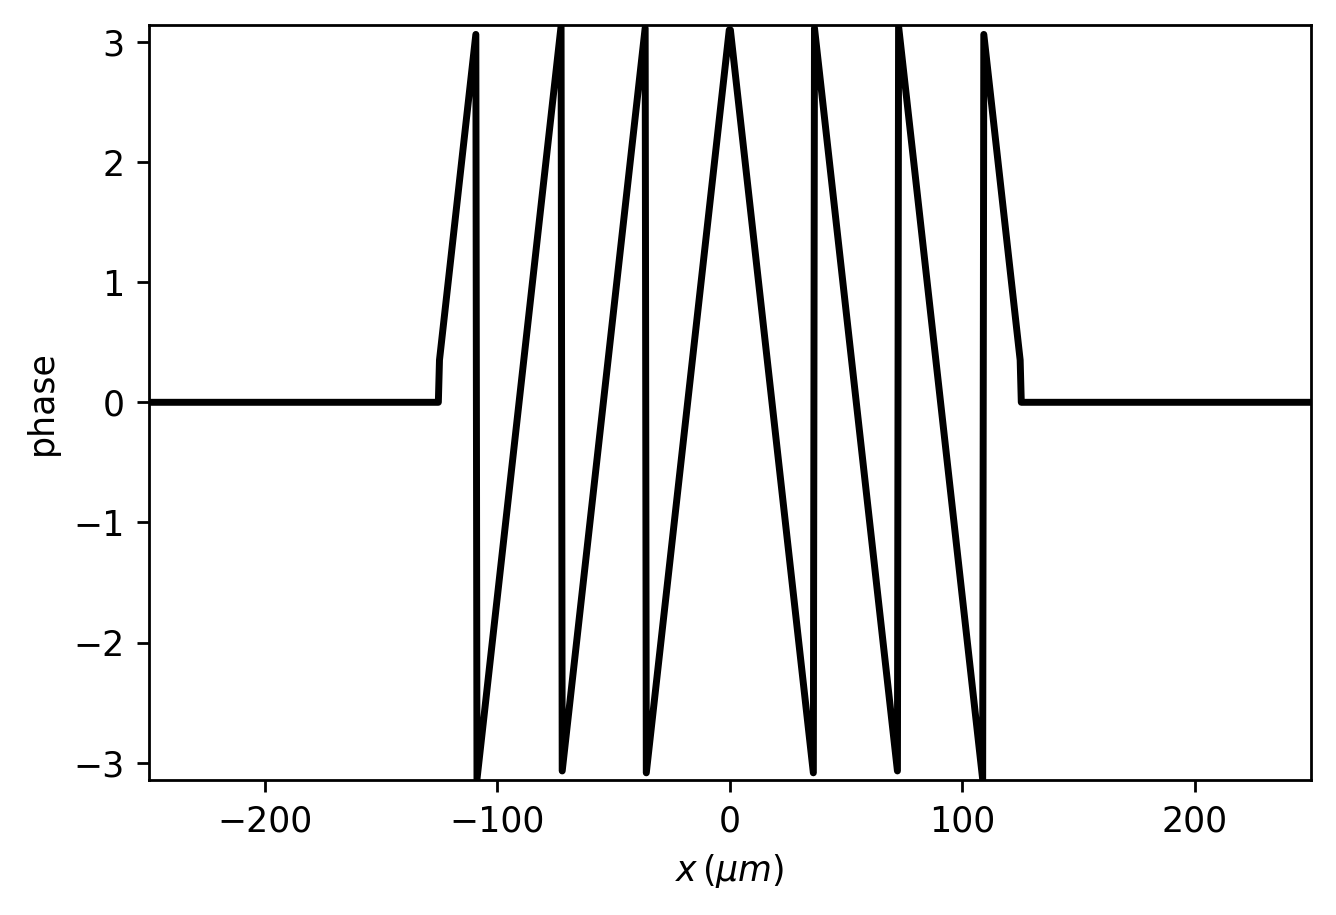

In [40]:
num_data = 1024
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.biprism_fresnel(
    angle=1 * degrees, x0=0 * um, radius=125)
t1.draw(kind='phase')

## Fresnel biprism from material properties n and h

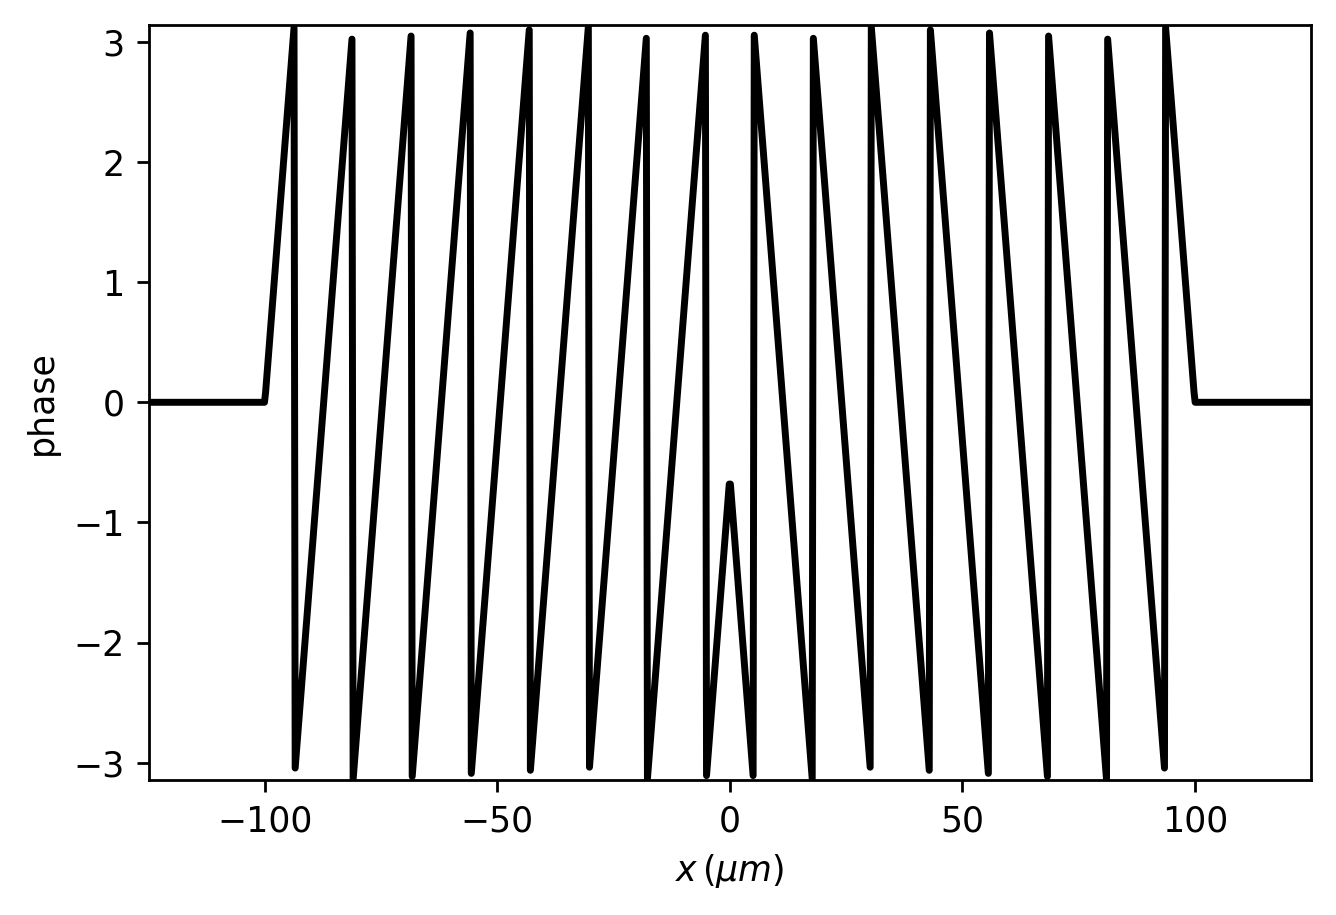

In [14]:
num_data = 1024
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.biprism_fresnel_nh(x0=0, width=100 * um, height=5 * um, n=1.5)

t1.draw(kind='phase')


## standard lens

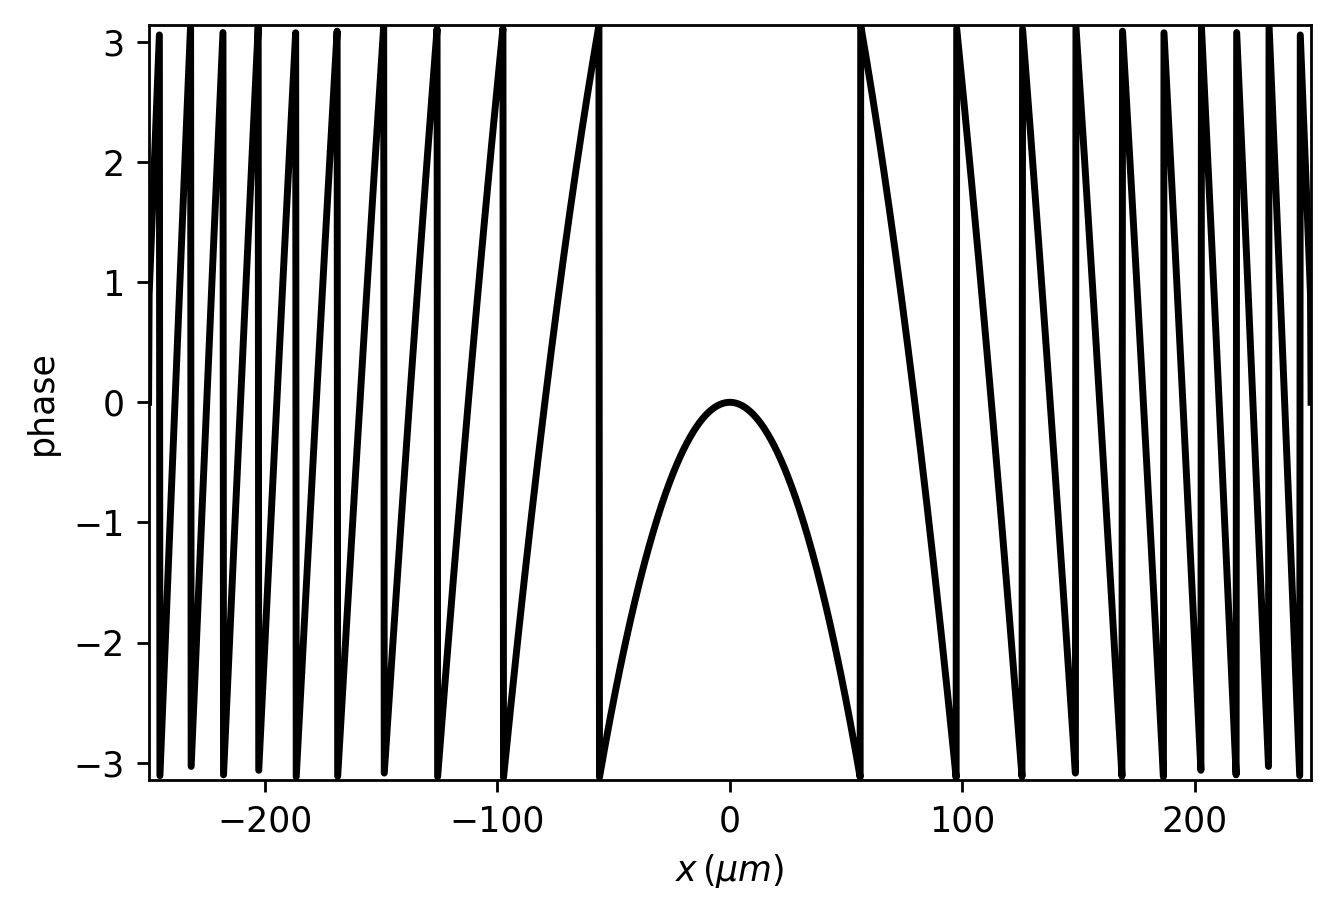

In [15]:
num_data = 2048
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.lens(x0=0 * um, radius=250 * um, focal=5 * mm)
t1.draw(kind='phase')

## Fresnel lens: amplitude and phase

In [16]:
num_data = 1024
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

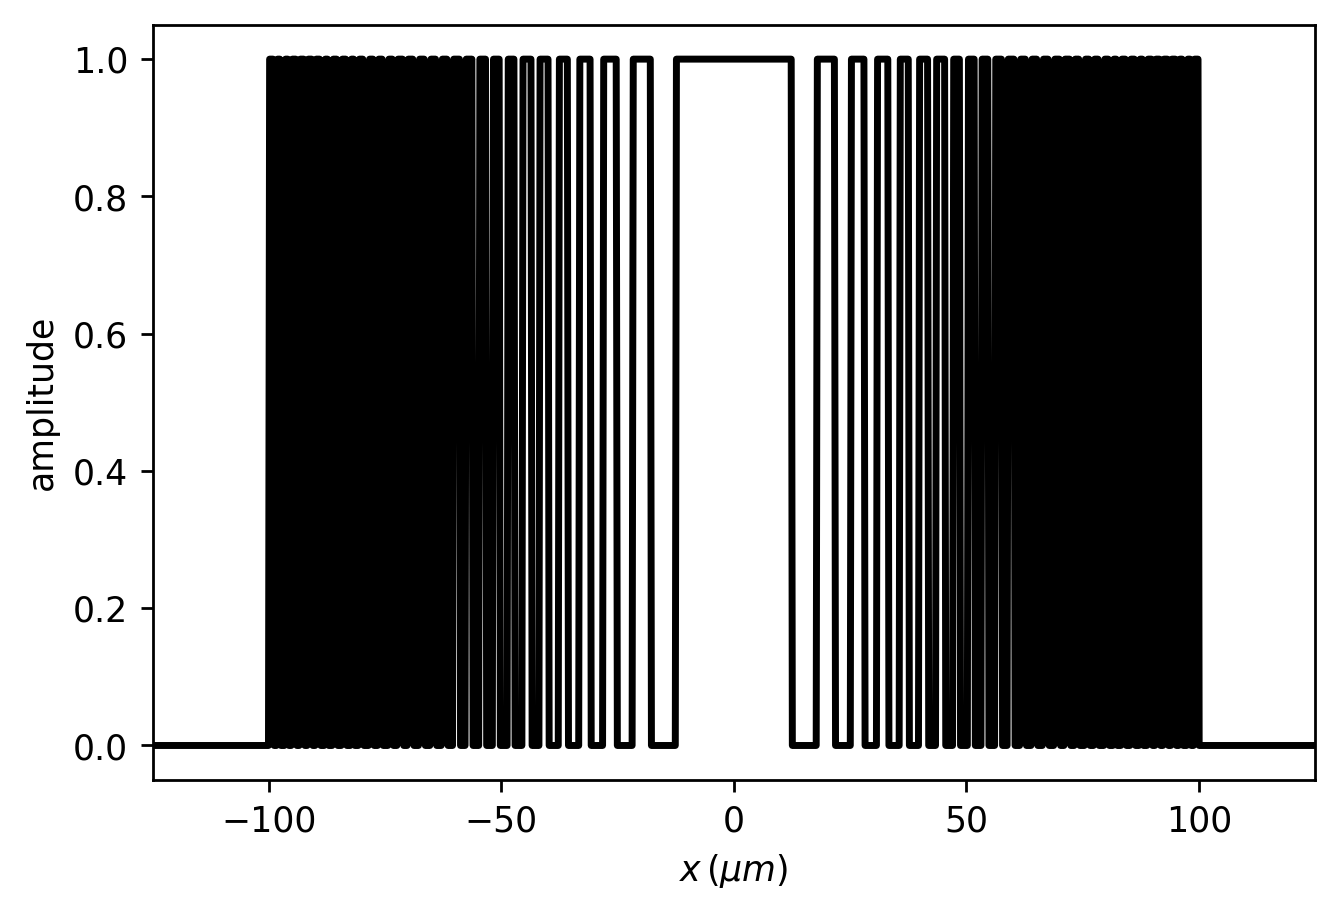

In [17]:
t1 = Scalar_mask_X(x, wavelength)
t1.fresnel_lens(
    x0=0 * um,
    radius=100 * um,
    focal=.25 * mm,
    mask=True,
    kind='amplitude',
    phase=np.pi)
t1.draw(kind='amplitude')

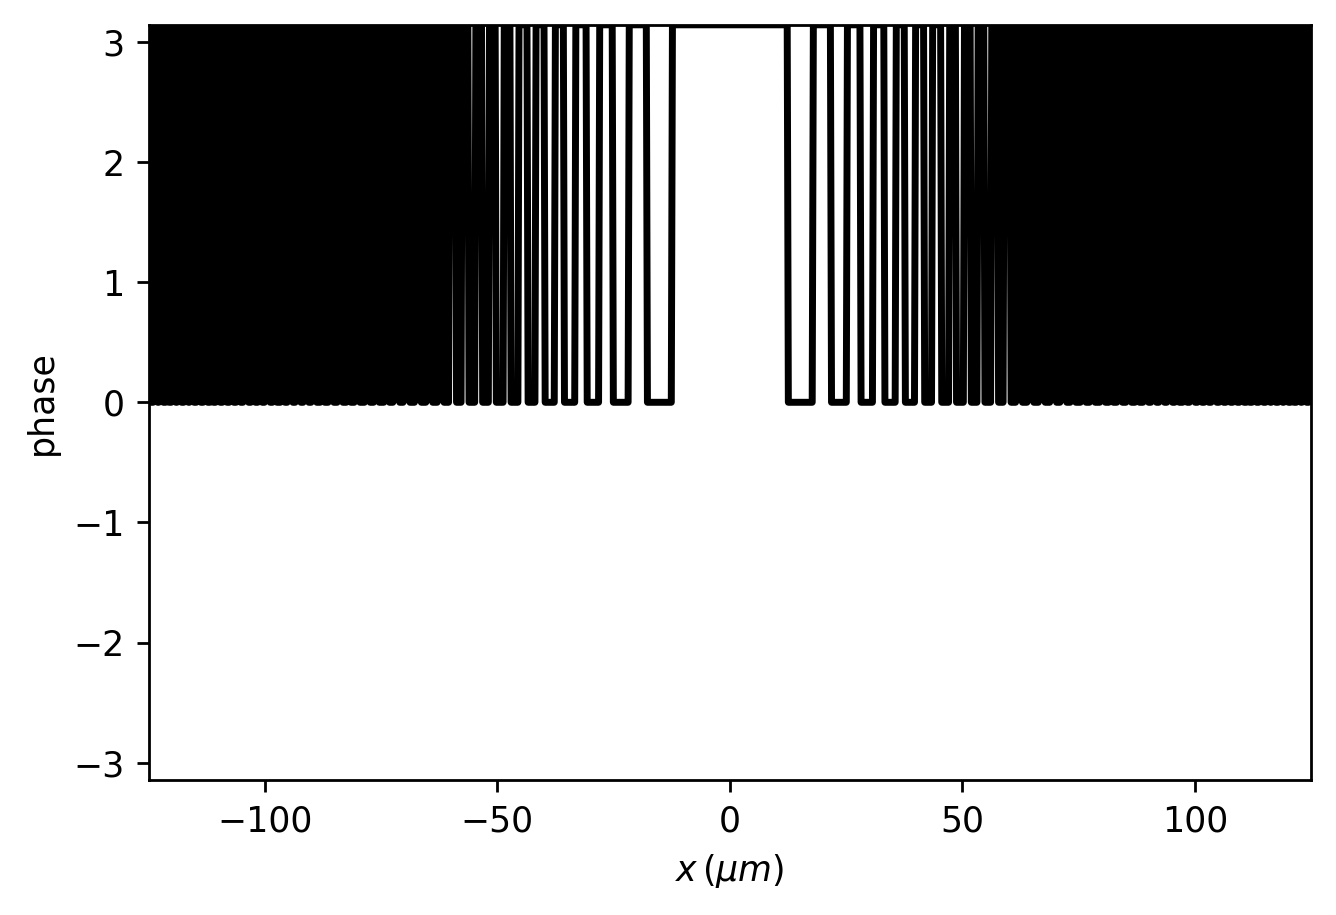

In [18]:
t1.fresnel_lens(
    x0=0 * um,
    radius=100 * um,
    focal=.25 * mm,
    mask=True,
    kind='phase',
    phase=np.pi)
t1.draw(kind='phase')

## rough surface

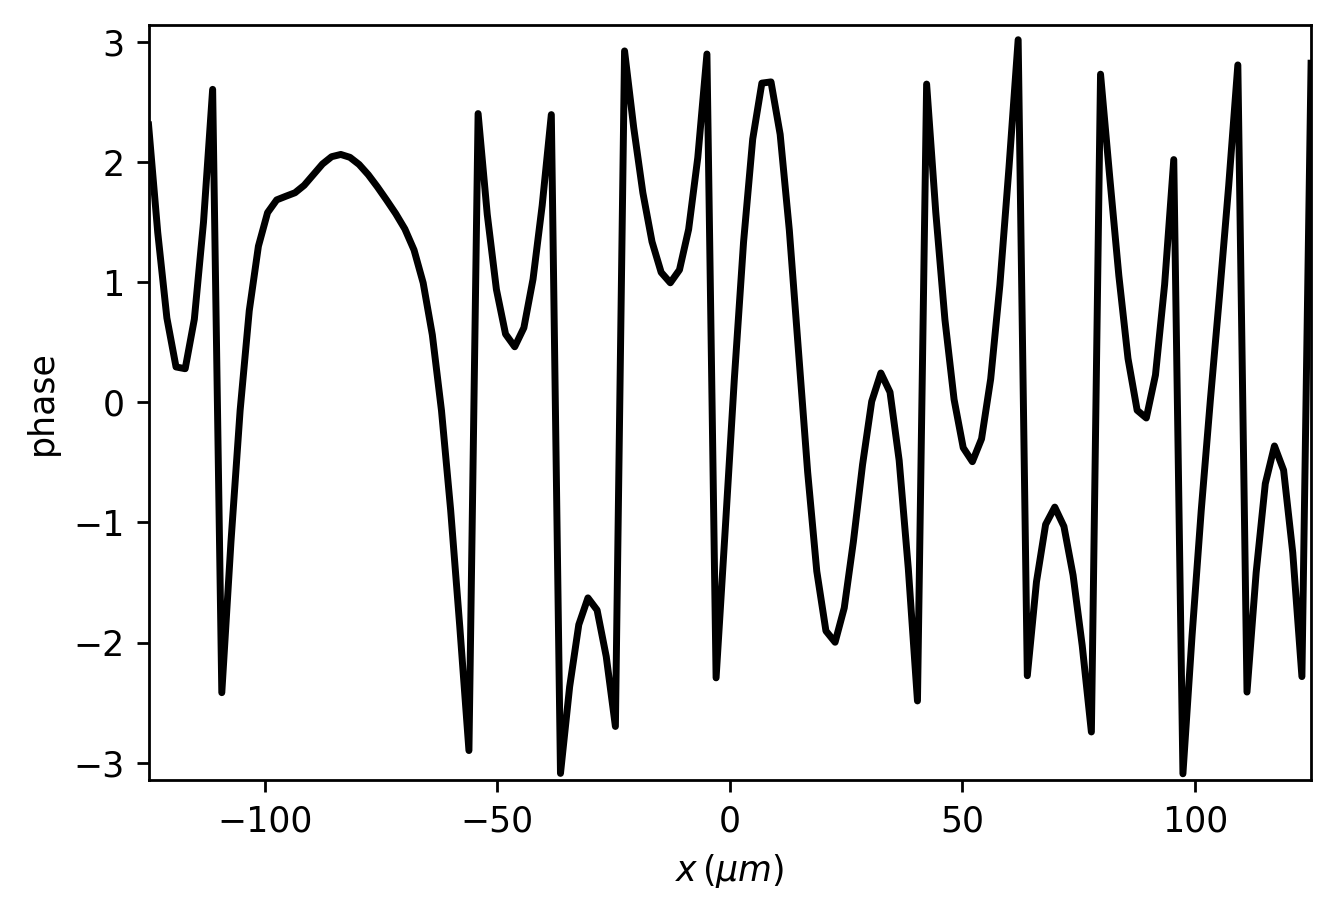

In [19]:
num_data = 128
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_X(x, wavelength)
t1.roughness(t=15 * um, s=.2 * um)
t1.draw(kind='phase')

## Dust particles with different sizas

TODO: does not work properly

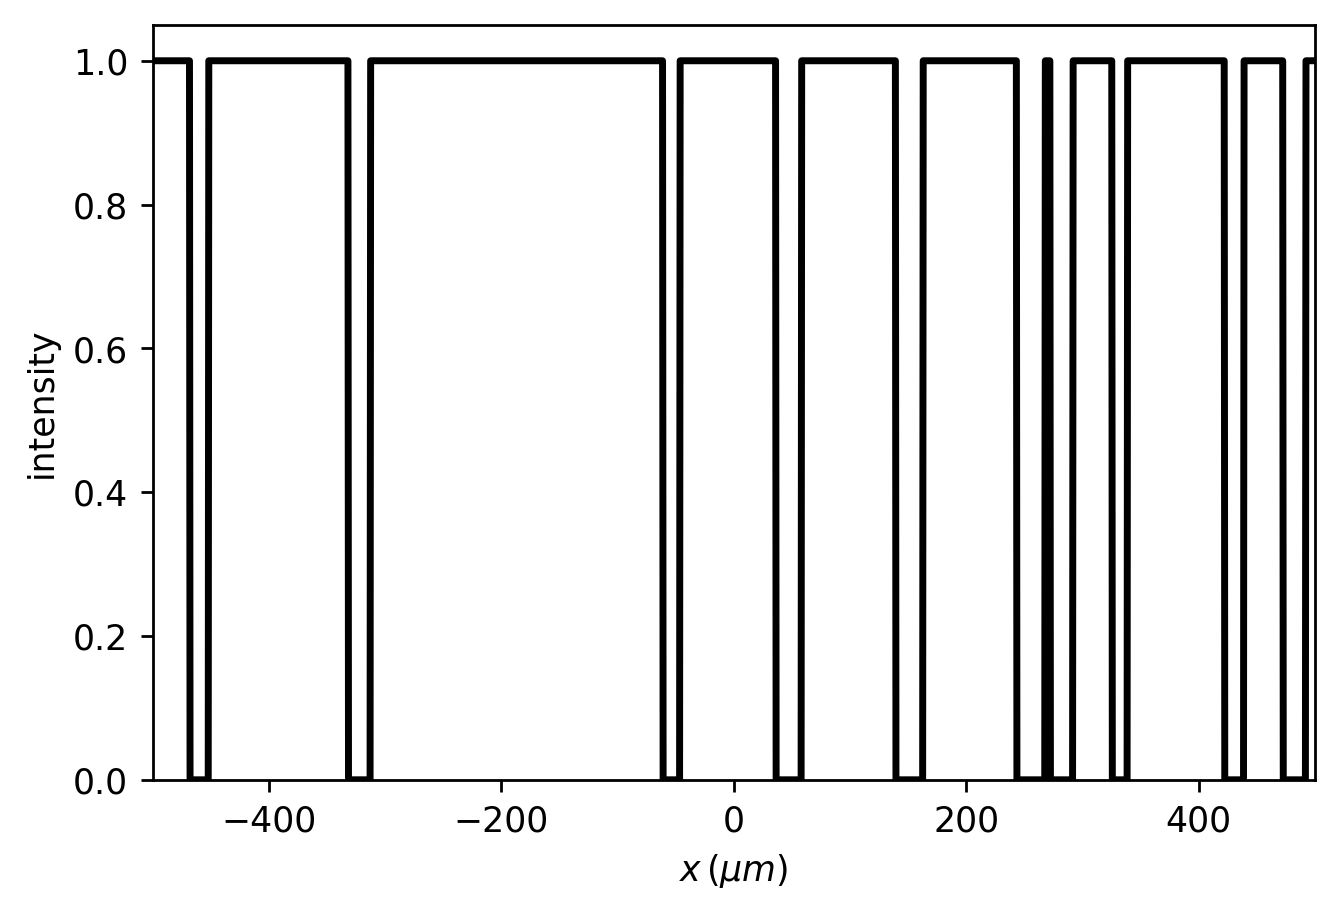

In [20]:
wavelength = 0.6328 * um
x = np.linspace(-500 * um, 500 * um, 2048)

t1 = Scalar_mask_X(x, wavelength)
t1.dust_different_sizes(percentage=0.2, size=20 * um, std=5 * um)
t1.draw()

## dust particles

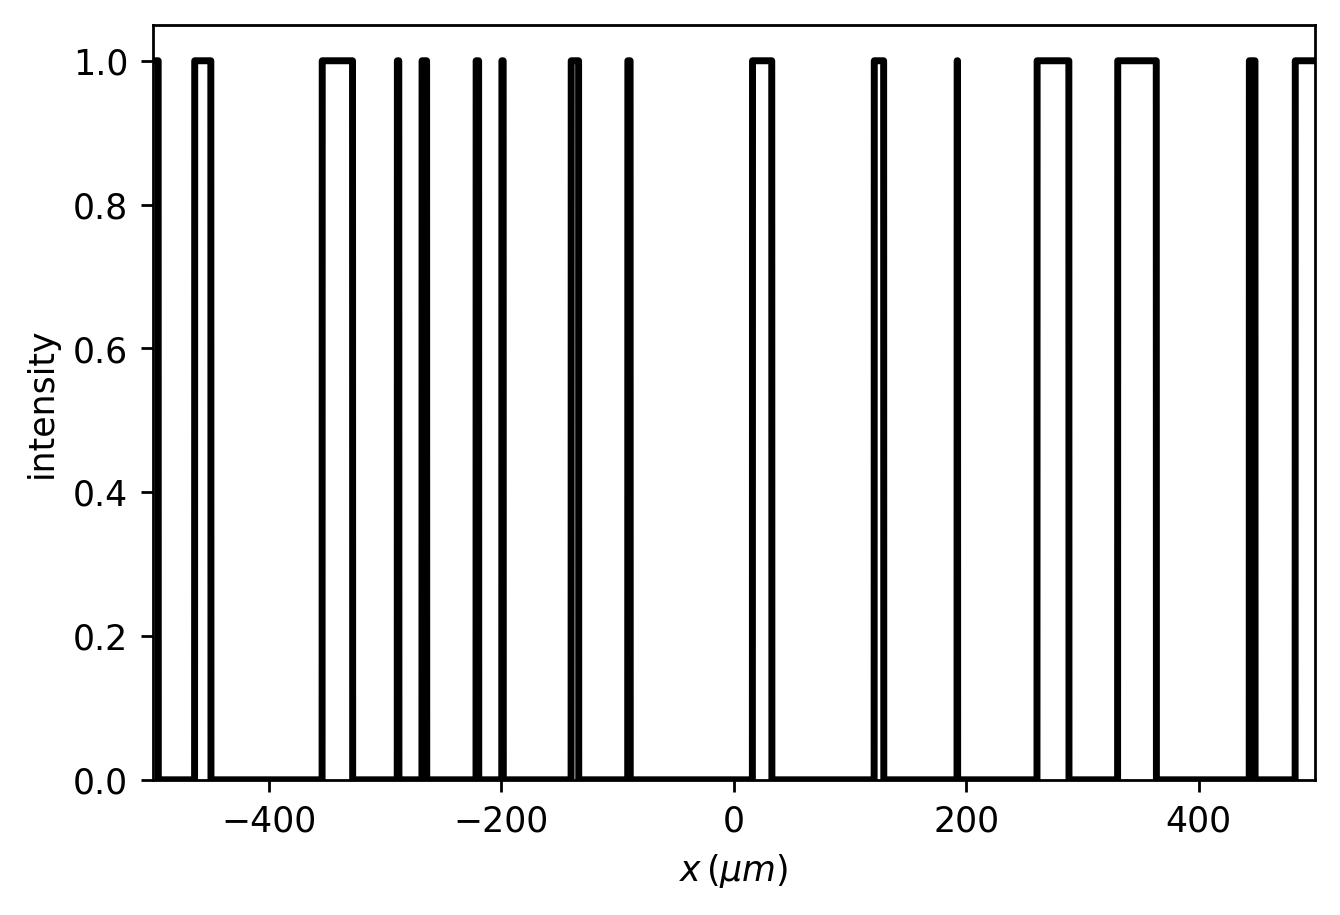

In [21]:
wavelength = 0.6328 * um
x = np.linspace(-500 * um, 500 * um, 2048 * 8)

t1 = Scalar_mask_X(x, wavelength)
t1.dust(percentage=0.9, size=20 * um)
t1.draw()

## bit structure

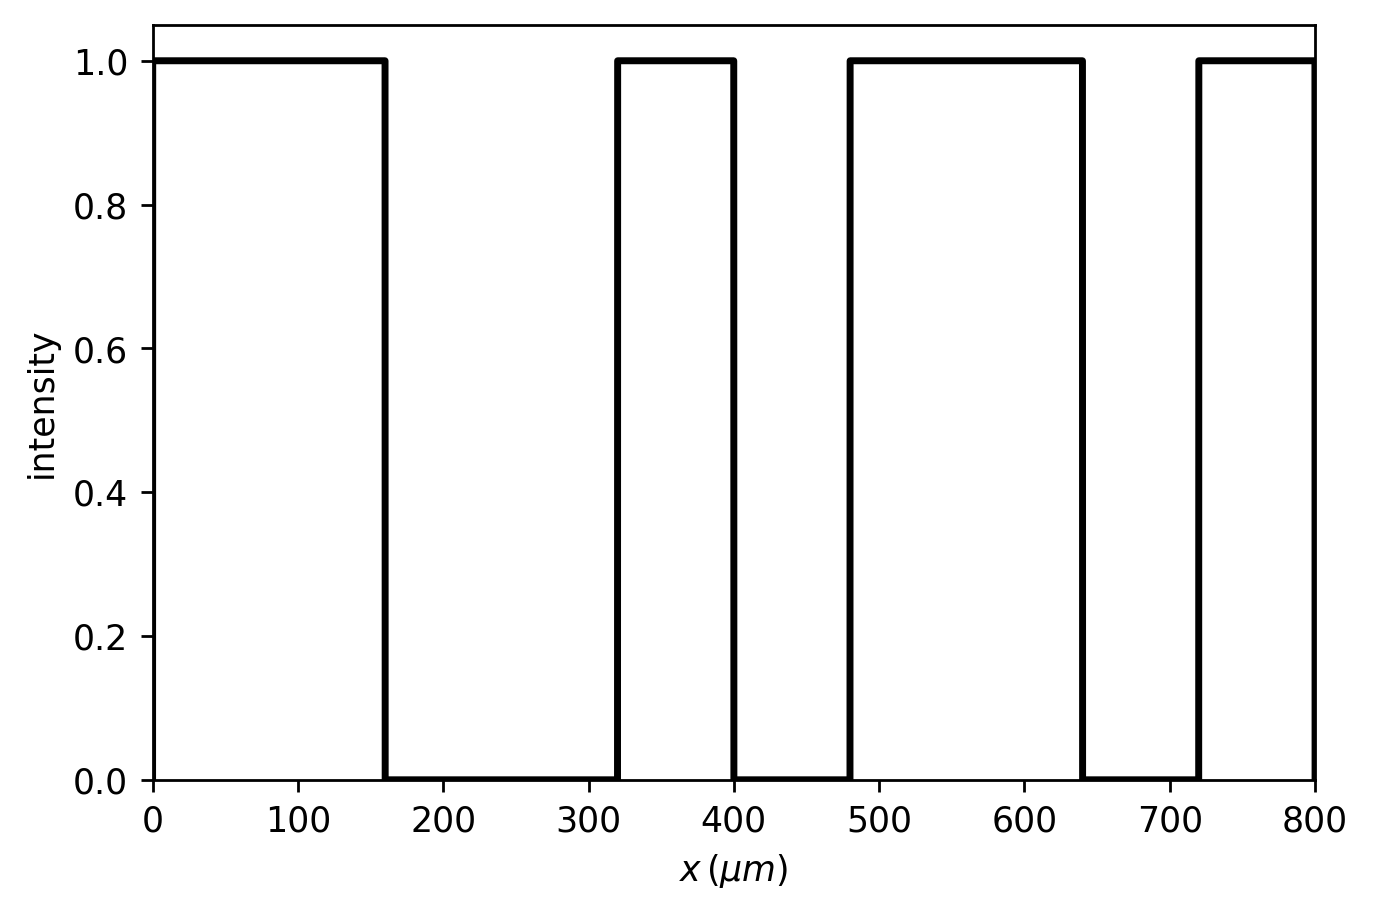

In [22]:
num_data = 2048 * 4

wavelength = 0.85 * um
code = [1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
bit_width = 80 * um
x = np.linspace(0, bit_width * len(code), num_data)

t1 = Scalar_mask_X(x, wavelength)
t1.binary_code(kind='normal', code=code, bit_width=bit_width, x0=0 * um)
t1.draw()


## Gratings

### sine grating

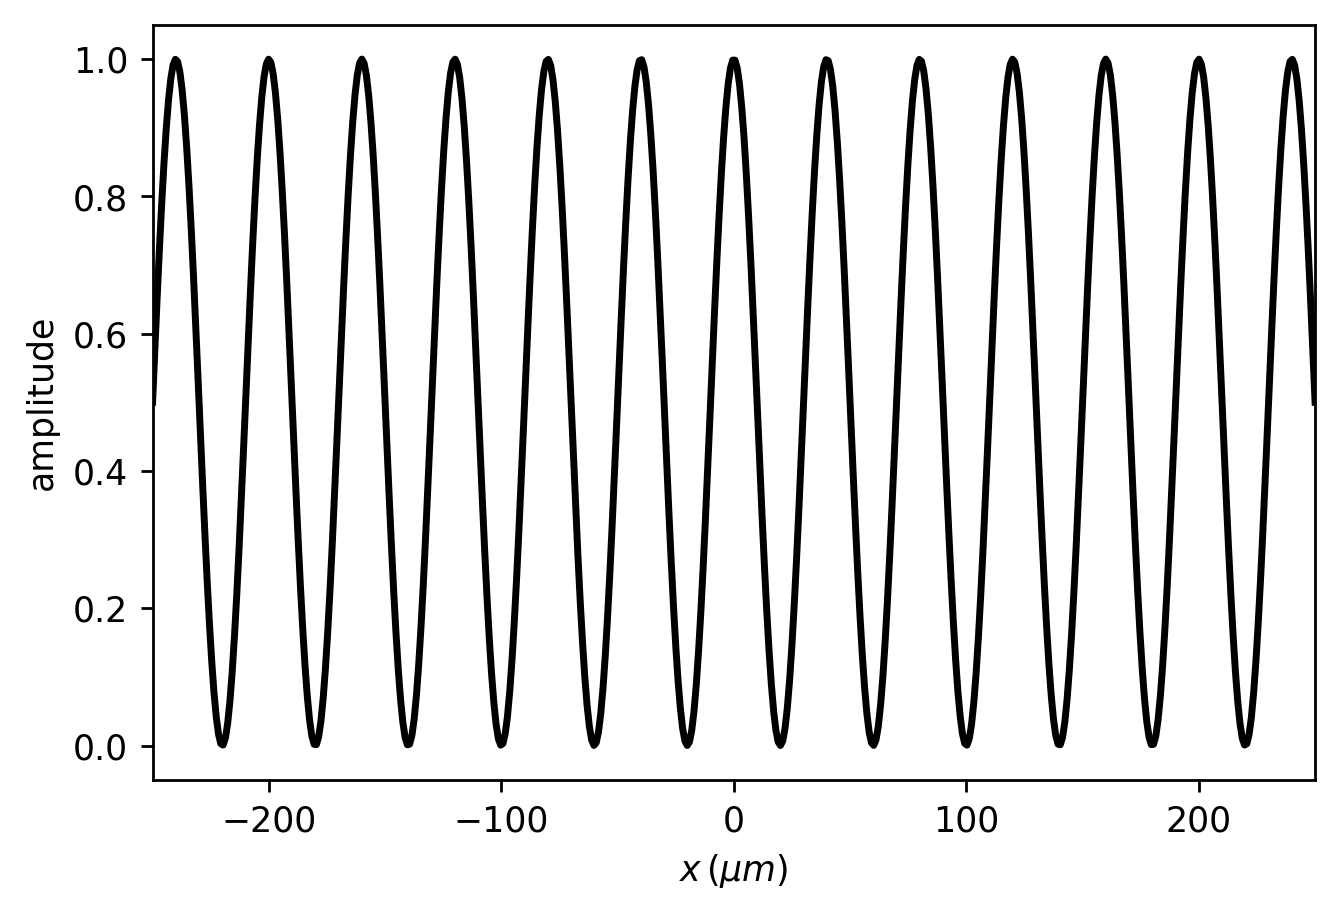

In [23]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 40 * um
red = Scalar_mask_X(x, wavelength)
red.sine_grating(period=period, amp_min=0, amp_max=1, x0=0 * um)
red.draw(kind='amplitude')

### ronchi grating

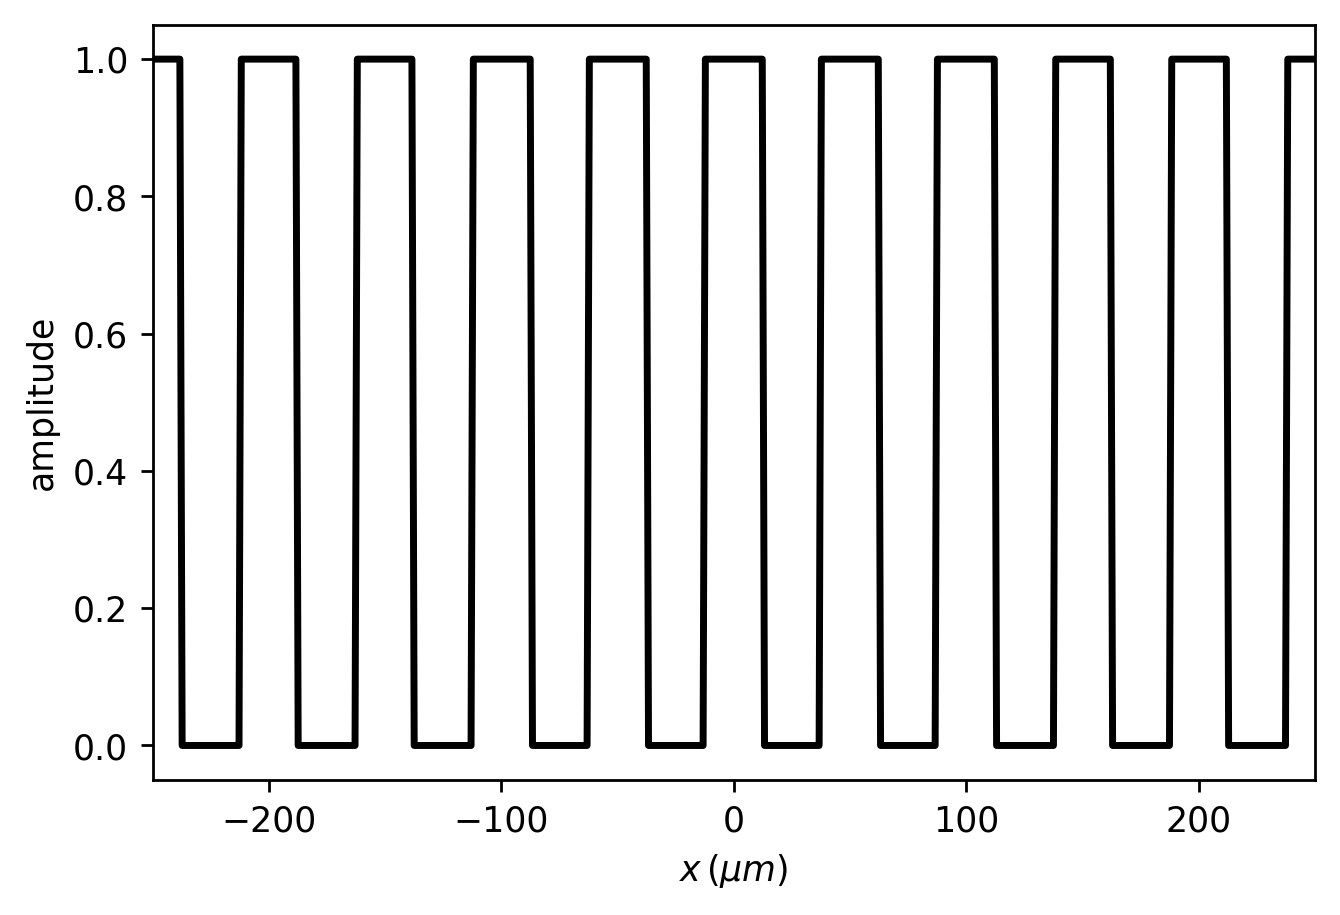

In [24]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_X(x, wavelength)
red.ronchi_grating(period=50 * um, x0=0 * um, fill_factor=0.5)
red.draw(kind='amplitude')

### binary grating: amplitude and phase

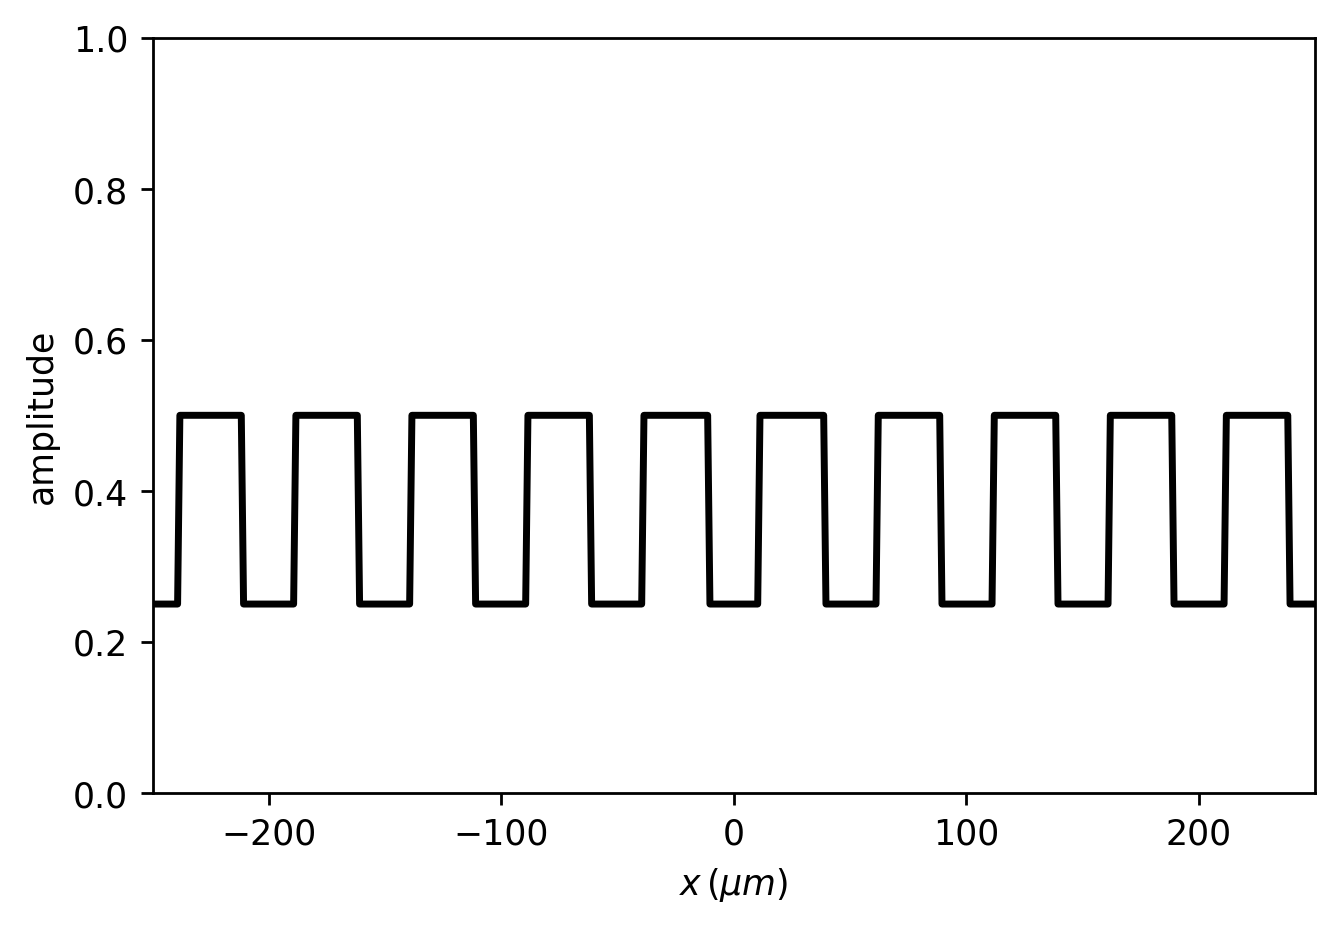

In [25]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_X(x, wavelength)
red.binary_grating(
    period=50 * um,
    amin=0.25,
    amax=0.5,
    phase=np.pi,
    x0=25 * um,
    fill_factor=0.55)
red.draw(kind='amplitude')
plt.ylim(0,1);

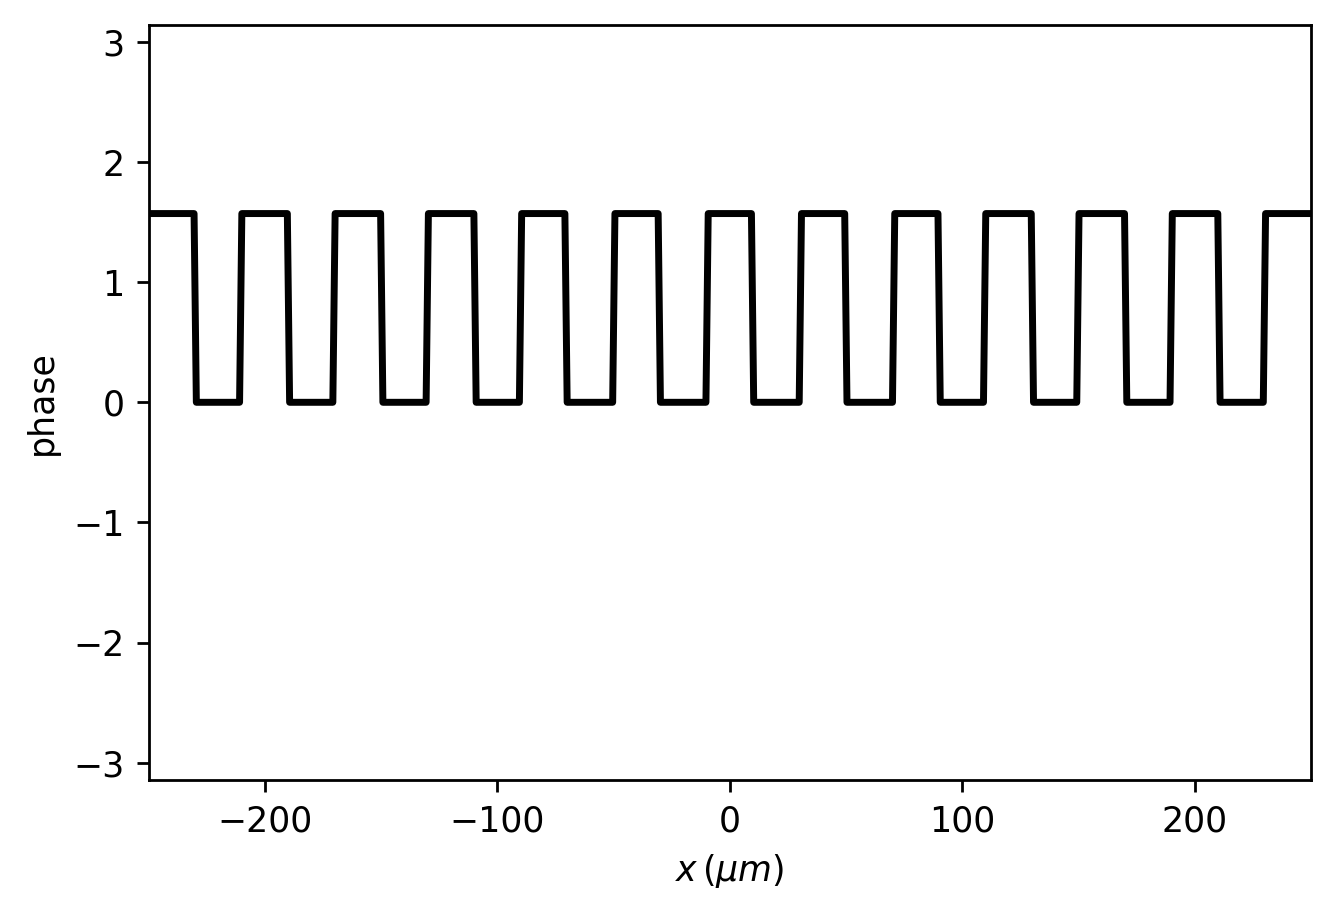

In [26]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 40 * um
red = Scalar_mask_X(x, wavelength)
red.binary_grating(
    period=period,
    amin=1,
    amax=1,
    phase=np.pi / 2,
    x0=0,
    fill_factor=0.5)
red.draw(kind='phase')

### blazed grating

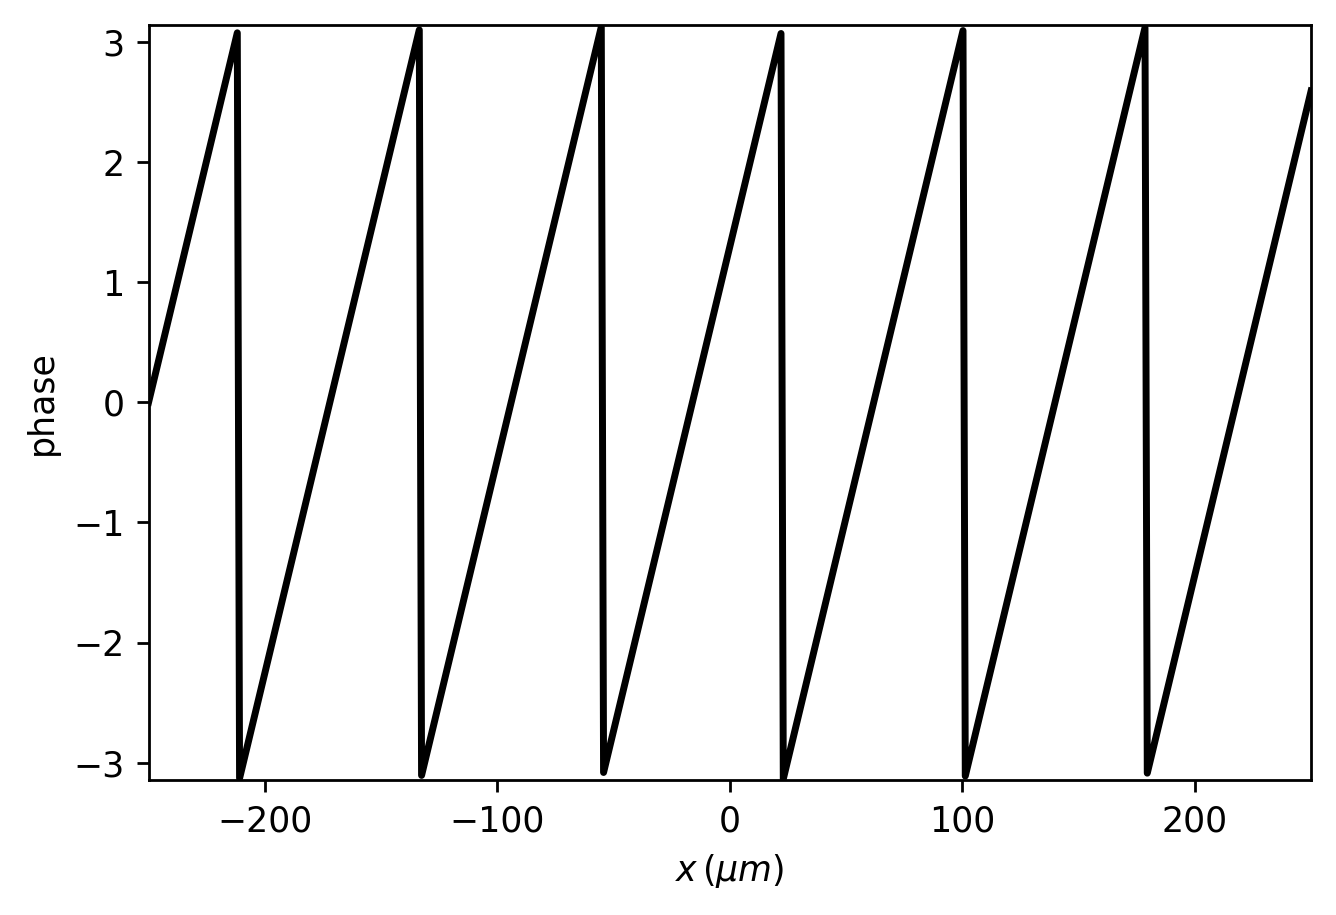

In [27]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 125 * um
red = Scalar_mask_X(x, wavelength)
red.blazed_grating(x0=0, period=period, height=2 * um, n=1.5)
red.draw(kind='phase')

### chirped grating: general

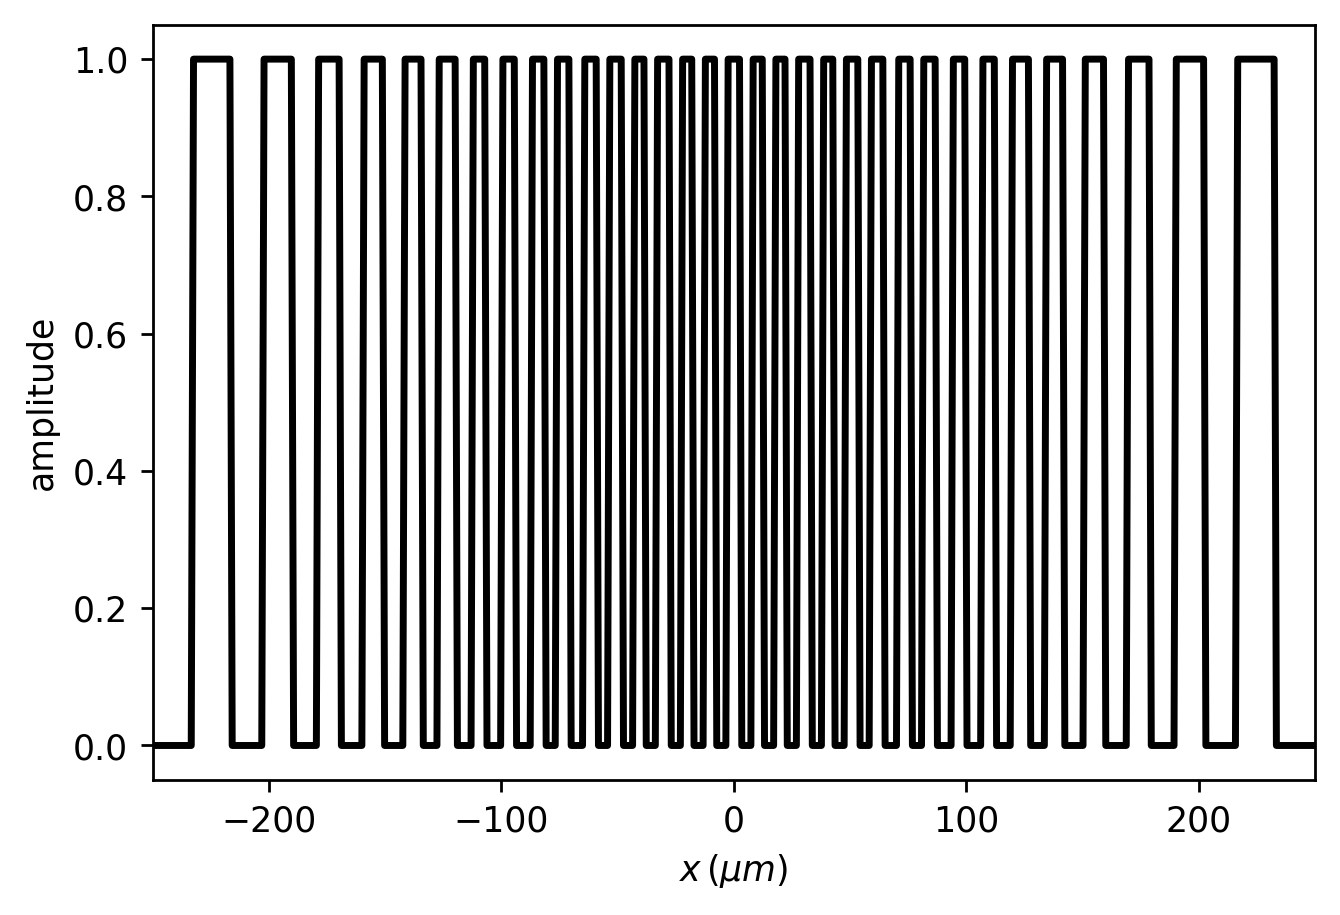

In [28]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um

fx = '10+20*(self.x/length)**2'

red = Scalar_mask_X(x, wavelength)
red.chirped_grating(
    kind='amplitude_binary',
    p_x=fx,
    length=500 * um,
    x0=0 * um,
    amp_max=1,
    amp_min=0,
    delta_x=0,
    phase_max=np.pi)
red.draw(kind='amplitude')

### chirped grating: linear p

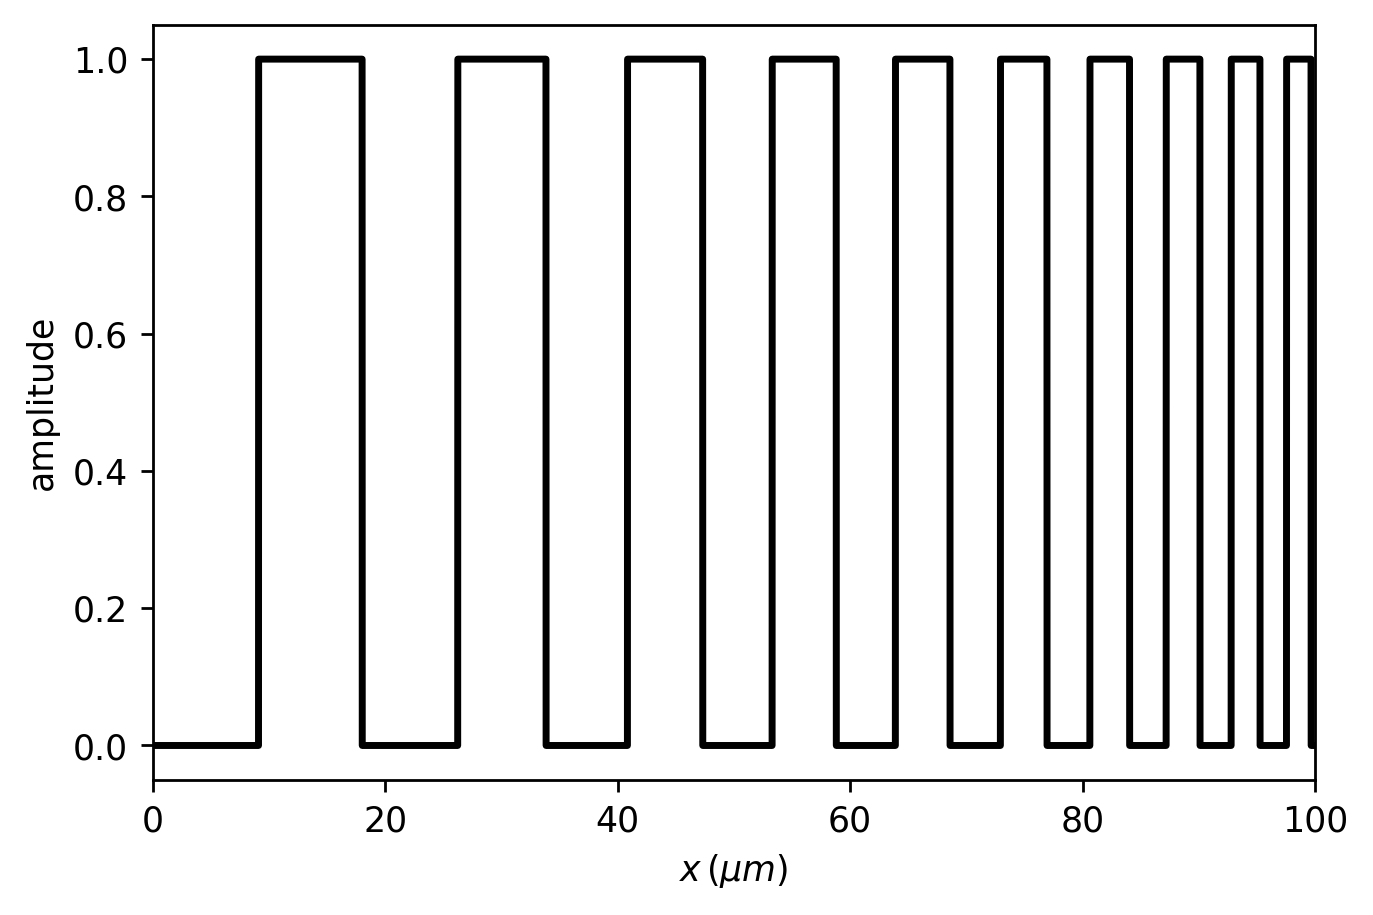

In [29]:
x = np.linspace(0 * um, 100 * um, 4096 * 4)
wavelength = 0.6238 * um
red = Scalar_mask_X(x, wavelength)
conds = {
    'kind': 'amplitude_binary',
    'p0': 20 * um,
    'p1': 4 * um,
    'amp_min': 0,
    'amp_max': 1,
    'delta_x': 0,
    'phase_max': np.pi,
    'length': 0,  # equal to length of x
}
red.chirped_grating_p(**conds)
red.draw(kind='amplitude')

### chirped grating: linear q

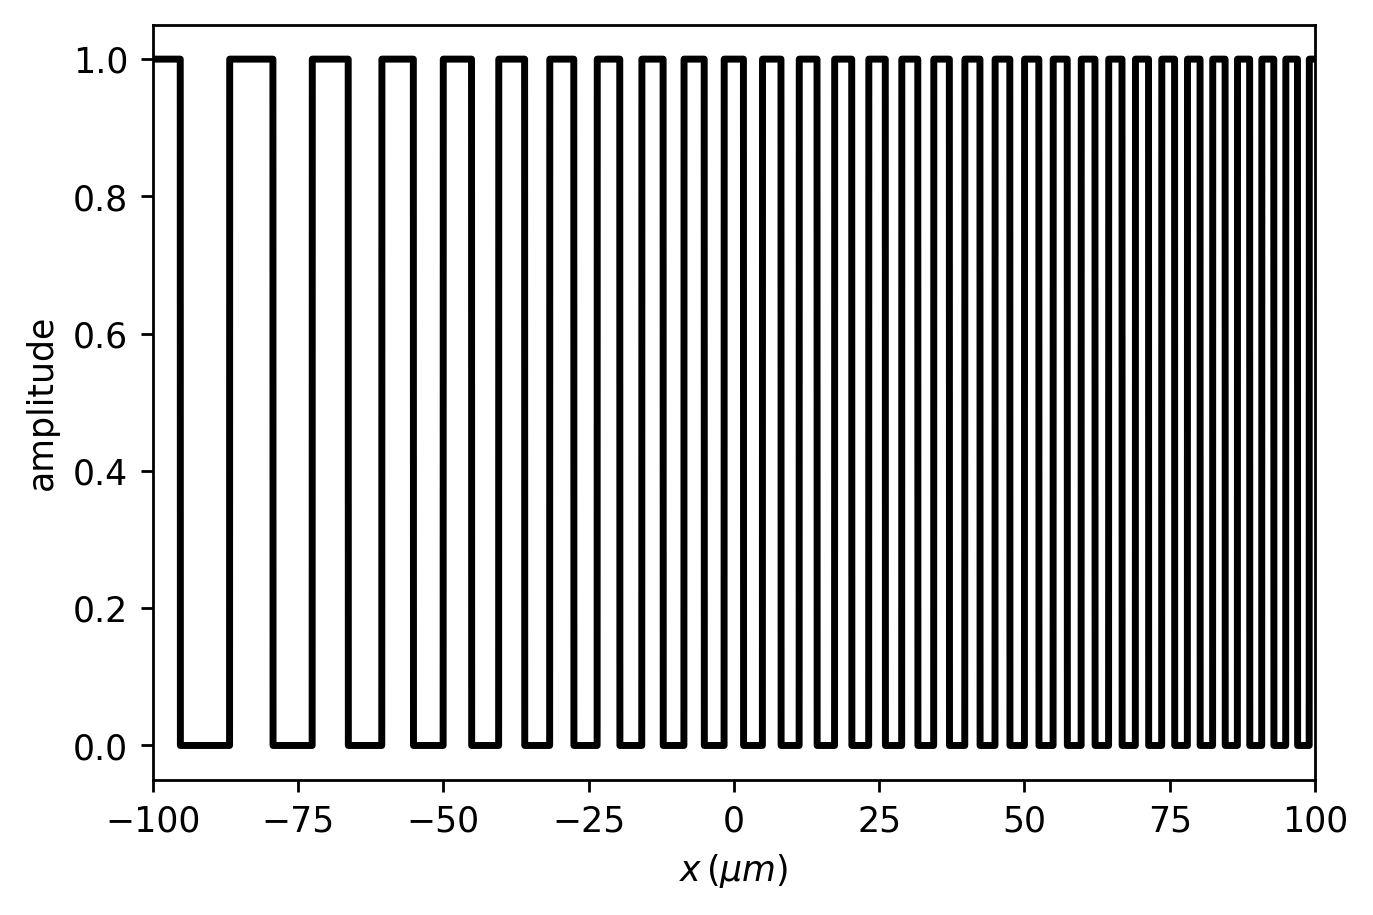

In [30]:
x = np.linspace(-100 * um, 100 * um, 4096 * 4)
wavelength = 0.6238 * um
red = Scalar_mask_X(x, wavelength)
conds = {
    'kind': 'amplitude_binary',
    'p0': 20 * um,
    'p1': 4 * um,
    'amp_min': 0,
    'amp_max': 1,
    'delta_x': 0,
    'phase_max': np.pi,
    'length': 0,  
}
red.chirped_grating_q(**conds)
red.draw(kind='amplitude')